In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.14


In [3]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object

In [4]:
def act(t,robot):
    
    if t<1.5:
        robot['left'].F=10
        robot['right'].F=10
    else:
        robot['left'].F=0
        robot['right'].F=0
        
    

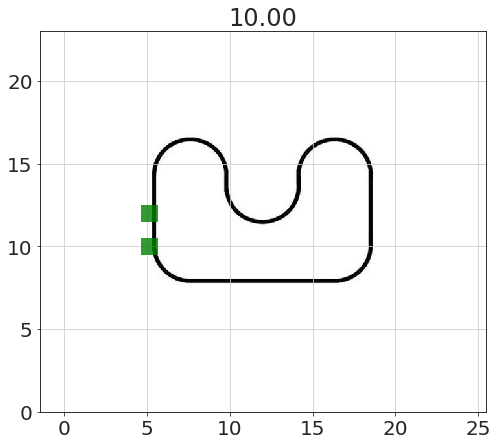

In [5]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [23]:
def forward_until_black(t,robot):
    
    color=robot['left'].read_color()
    
    if color[0]>150:
        robot['left'].F=20
        robot['right'].F=20
    else:
        robot['left'].F=0
        robot['right'].F=0
        
    robot.message=color

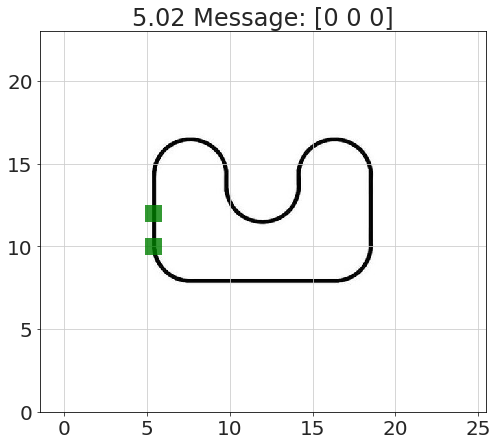

In [24]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

run_sim(env,forward_until_black,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [31]:
def turn_90_degrees(t,robot):
    
    if t<1.8:
        robot['left'].F=-10
        robot['right'].F=10
    else:
        robot['left'].F=0
        robot['right'].F=0
     
    
    

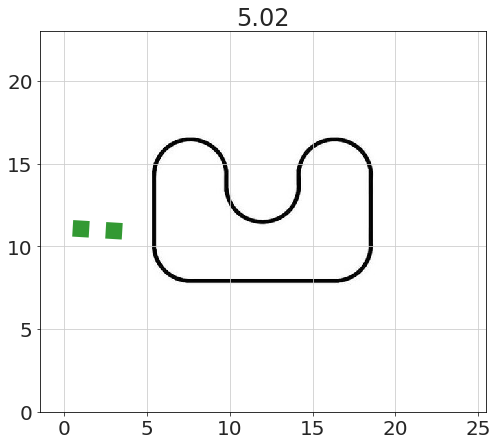

In [32]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

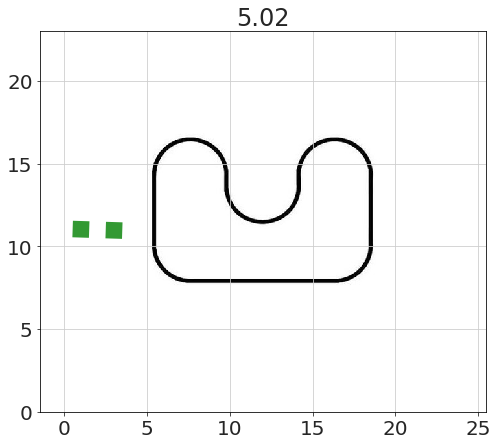

In [39]:
def turn_90_degrees(t,robot):
    
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
    else:
        
        d=robot['left'].read_distance()
        if d<robot.last_distance:
            robot['left'].F=-10
            robot['right'].F=10
            robot.last_distance=d
        else:
            robot['left'].F=0
            robot['right'].F=0
     
    robot.storage+=t,robot['left'].read_distance()
    
    
# turn for .9 seconds
# turn until the distance increases
# stop

    
    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

In [37]:
t,d=robot.storage.arrays()

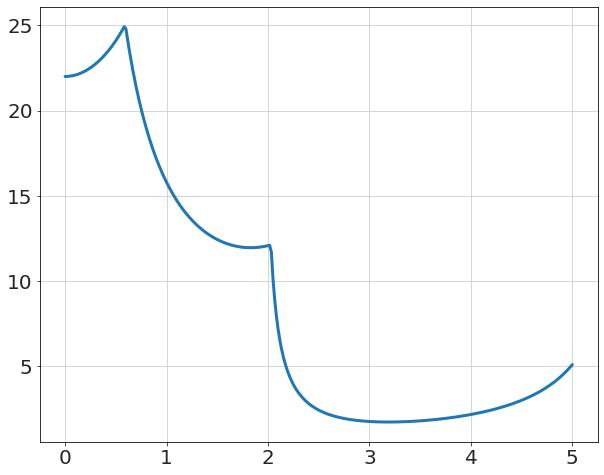

In [38]:
plot(t,d)

# rewriting the act function to be more procedural

1. turn for 0.9 seconds
2. turn until min distace
3. stop


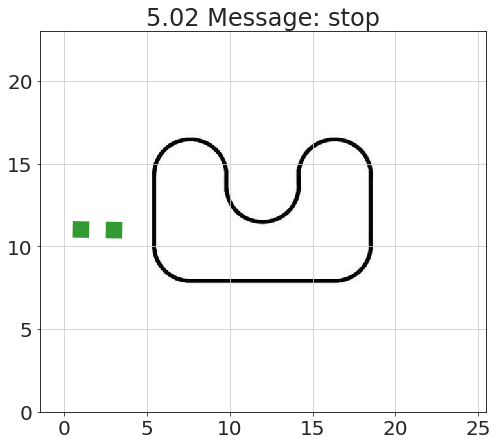

In [49]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
    
def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['left'].read_distance()
    if d<robot.last_distance:
        robot['left'].F=-10
        robot['right'].F=10
        robot.last_distance=d
        return False
    else:
        return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['left'].F=0
    robot['right'].F=0
    
    return False  # never done
    

def turn_90_degrees(t,robot):
    
    actions=[turn_a_bit,turn_to_min_distance,stop]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.start_time=0.0
        
    action=actions[robot.current_action]
    
    value=action(t-robot.start_time,robot)
    
    if value:  # done with this action
        robot.current_action+=1
        robot.start_time=t
        

    robot.storage+=t,robot['left'].read_distance()

    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.05,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

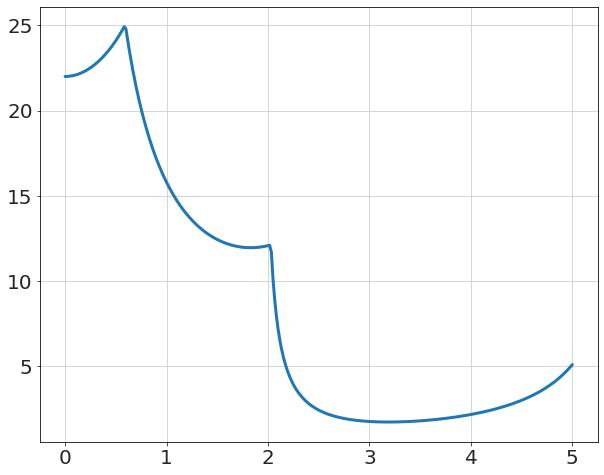

In [46]:
t,d=robot.storage.arrays()
plot(t,d)

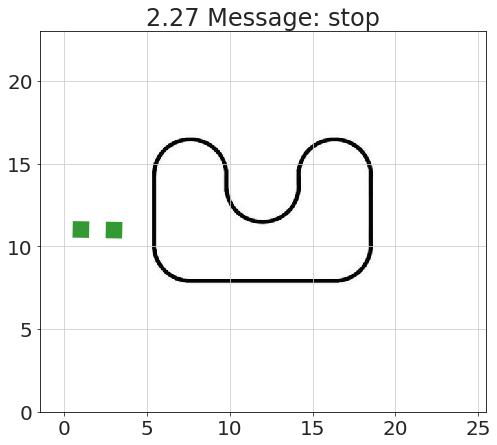

In [50]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
    
def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['left'].read_distance()
    if d<robot.last_distance:
        robot['left'].F=-10
        robot['right'].F=10
        robot.last_distance=d
        return False
    else:
        return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['left'].F=0
    robot['right'].F=0
    
    return False  # never done
    

def turn_90_degrees(t,robot):
    
    actions=[turn_a_bit,turn_to_min_distance,stop]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.start_time=0.0
        
    action=actions[robot.current_action]
    
    value=action(t-robot.start_time,robot)
    
    if value:  # done with this action
        robot.current_action+=1
        robot.start_time=t
        

    robot.storage+=t,robot['left'].read_distance()

    
env=Environment(image='../images/linepath1.jpeg', # up one folder example
                linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.05,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

# Many-part robot

In [60]:
def build_with_funny_bug(robot):    
    
    # use loops!
    w=.3
    buffer=0.05
    x=2
    y=10
    
    boxes=[]
    old_b=None
    
    for i in range(10):
        new_b=Box(robot,x,y+(w+buffer)*i,width=w,height=w,
            name='box%d' % i)
        boxes.append(new_b)
        
        if not old_b is None:
            connect(old_b,new_b,'weld')
        
        old_b=new_b
        

In [70]:
def build(robot):    
    
    # use loops!
    w=.3
    buffer=0.05
    x=2
    y=10
    
    boxes=[]
    for i in range(10):
        new_b=Box(robot,x,y+(w+buffer)*i,width=w,height=w,
            name='box%d' % i)
        boxes.append(new_b)
        

    for i,b1 in enumerate(boxes):
        for j,b2 in enumerate(boxes[i+1:]):
            connect(b1,b2,'weld')

In [71]:
def act(t,robot):
    robot['box0'].F=10
    robot['box9'].F=10

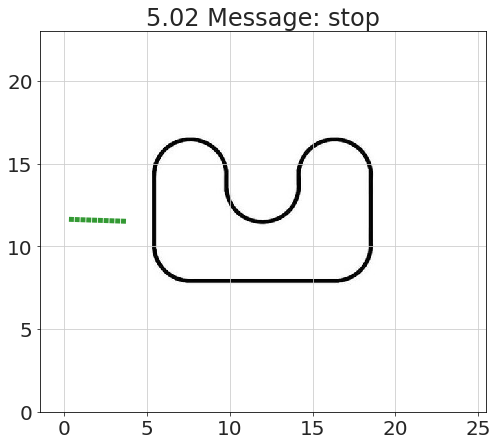

In [90]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.3:
        robot['box9'].F=-10
        robot['box0'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
def turn_forces_on(t,robot):
    robot['box9'].F=-10
    robot['box0'].F=10
    return True        #  done with this behavior

def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['box9'].read_distance()
    if d<=robot.last_distance:
        robot['box9'].F=-2
        robot['box0'].F=2
        robot.last_distance=d
        return False
    else:
        return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['box9'].F=0
    robot['box0'].F=0
    
    return False  # never done
    
    
def continue_for_time(time_interval):
    
    def _act(t,robot):
        robot.message='continue for time'
        if t<time_interval:
            return False
        else:
            return True
        
    return _act

def turn_90_degrees(t,robot):
    
    actions=[turn_forces_on,continue_for_time(0.3),turn_to_min_distance,continue_for_time(0.1),stop]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.start_time=0.0
        
    action_function=actions[robot.current_action]
    
    value=action_function(t-robot.start_time,robot)
    
    if value:  # done with this action
        robot.current_action+=1
        robot.start_time=t
        

    robot.storage+=t,robot['box0'].read_distance()

    
env=Environment(image='../images/linepath1.jpeg', # up one folder example
                linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

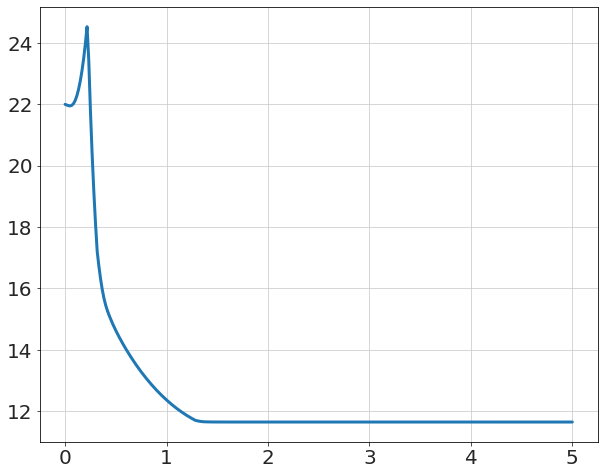

In [86]:
t,d=robot.storage.arrays()
plot(t,d)

# How to do a looped action in a sequence

In [91]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object

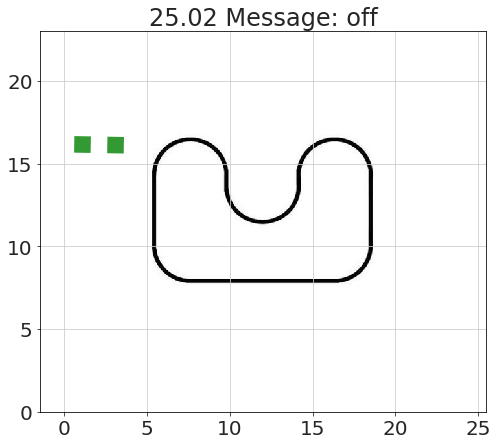

In [99]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
def continue_for_time(time_interval):
    
    def _act(t,robot):
        if t<time_interval:
            return False
        else:
            return True
        
    return _act

def turn_on_forward(t,robot):
    robot.message='on'
    robot['left'].F=10
    robot['right'].F=10
    return True
    
def turn_off_forward(t,robot):
    robot.message='off'
    robot['left'].F=0
    robot['right'].F=0
    return True
    
def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['left'].read_distance()
    if d<robot.last_distance:
        robot['left'].F=-10
        robot['right'].F=10
        robot.last_distance=d
        return False
    else:
        return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['left'].F=0
    robot['right'].F=0
    
    return False  # never done
    

def turn_90_degrees(t,robot):
    
    actions=[turn_a_bit,turn_to_min_distance,
             [turn_on_forward,continue_for_time(1),
              turn_off_forward,continue_for_time(3),
             ]]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.current_subaction=0
        robot.start_time=0.0
        
    action_function=actions[robot.current_action]
    if isinstance(action_function,list):
        action_subfunction=action_function[robot.current_subaction]
        value=action_subfunction(t-robot.start_time,robot)
    else:
        value=action_function(t-robot.start_time,robot)
    
    if value:  # done with this action
        if isinstance(action_function,list):  # a looped behavior
            robot.current_subaction+=1
            if robot.current_subaction>=len(action_function):
                robot.current_subaction=0
        else:
            robot.current_action+=1
            
        robot.start_time=t
        

    robot.storage+=t,robot['left'].read_distance()

    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=25,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    